# `DSML_WS_08` - Regression 2

Please work on the following task **before** the eighth workshop session.

## 1. Predicting electricity demand (continued)

Last week, we used electricity load data from Pittsburgh to predict peak electricity demand based on temperature using polynomial features. Let us put what we learned into practice by predicting **average electrical load** from **average temperature** using `scikit learn`. To do so follow the steps below:

- Define your X and y vectors.
- Define a train and test datasets using `train_test_split`
- Create empty lists to store the training and validation mean squared errors.
- Write a simple loop for degrees ranging from 0-50 in which you 
    - create the polynomial features using `PolynomialFeatures` with variable degree inputs and `fit_transform`
    - initialize and fit the model using `LinearRegression`
    - compute and append the errors to your error lists
- Illustrate the training and validation errors for different polynomial degrees.

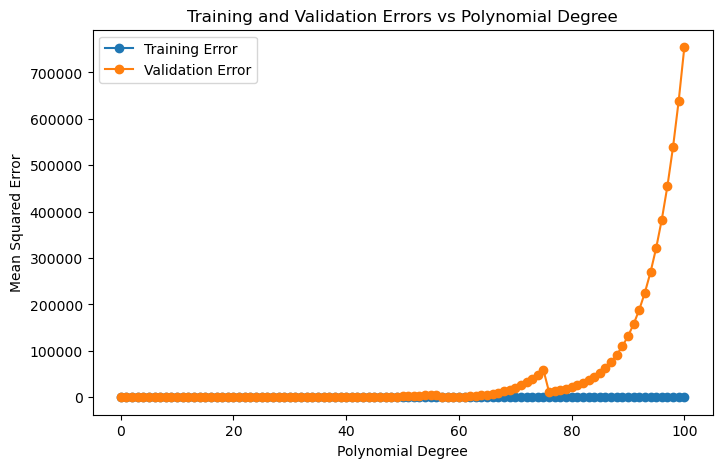

In [17]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv('Pittsburgh_load_data.csv')

X = data[['AVG']].values
y = data[['Avg_temp']].values

X_train , X_test , Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=40)
train_errors = []
test_errors = []

degrees = range(0,101)
for degree in degrees: 
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, Y_train)
    
    # Predict and compute errors
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(Y_train, y_train_pred))
    test_errors.append(mean_squared_error(Y_test, y_test_pred))

# Plot training and validation errors
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Validation Error", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Errors vs Polynomial Degree")
plt.show()

